<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU25_Modelo de gestión de Lista de Espera Quirúrgica</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>11.- ECA - Exploratory Causal Analysis</font>

<font color='steelblue'>Exploratory causal analysis (ECA) is the process of discovering the root causes of problems in order to identify appropriate solutions.</font>

## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Define the key challenge or setback</b>
    
<font color='steelblue'><b>Determine the causes and effects of the key challenge</b>
    
<font color='steelblue'><b>Use a diagram or graph to organize information</b>
    
<font color='steelblue'><b>Formulate a response to the primary causes of your challenge</b>
    
<font color='steelblue'><b>Review your process and address new causes and effects</b>



## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_25_09.2_01_lista_espera_completo_clean_v_01.csv</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [2]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_COLLATE=es_ES.UTF-8;LC_CTYPE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8"

## <font color='green'>Settings</font>

### Libraries to use

In [3]:
library(readr)
library(dplyr)
library(sf)
library(tidyr)
library(stringr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Linking to GEOS 3.11.2, GDAL 3.6.2, PROJ 9.2.0; sf_use_s2() is TRUE



### Paths

In [4]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [5]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [6]:
iFile <- "CU_25_09.2_01_lista_espera_completo_clean_v_01.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_25_09.2_01_lista_espera_completo_clean_v_01.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [8]:
data <- read.csv(file_data)


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [ ]:
data |> glimpse()

Muestra de los primeros datos:

In [ ]:
data |> slice_head(n = 5)

##  Exploratory causal analysis

**REFERENCE**
https://bookdown.org/paul/applied-causal-analysis/

<font color='tomato'>Select columns</font>

In [14]:
# Seleccionamos las variables a analizar. 

# Get a list of numeric columns
numeric_columns <- sapply(data, is.numeric)

# Extract the column names
cols <- names(numeric_columns)[numeric_columns]

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


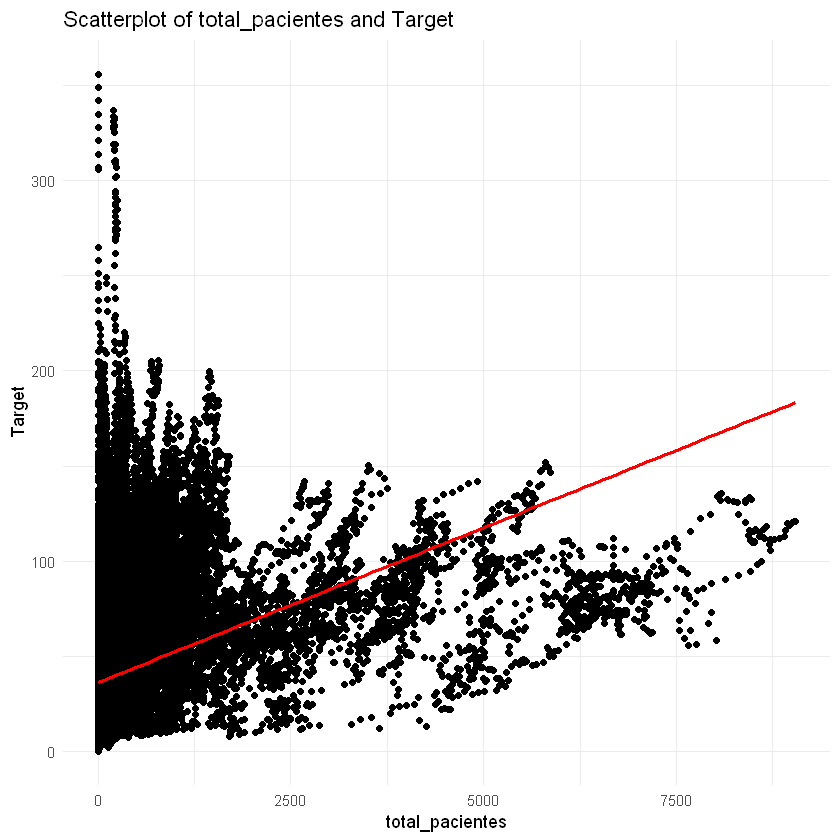

`geom_smooth()` using formula = 'y ~ x'


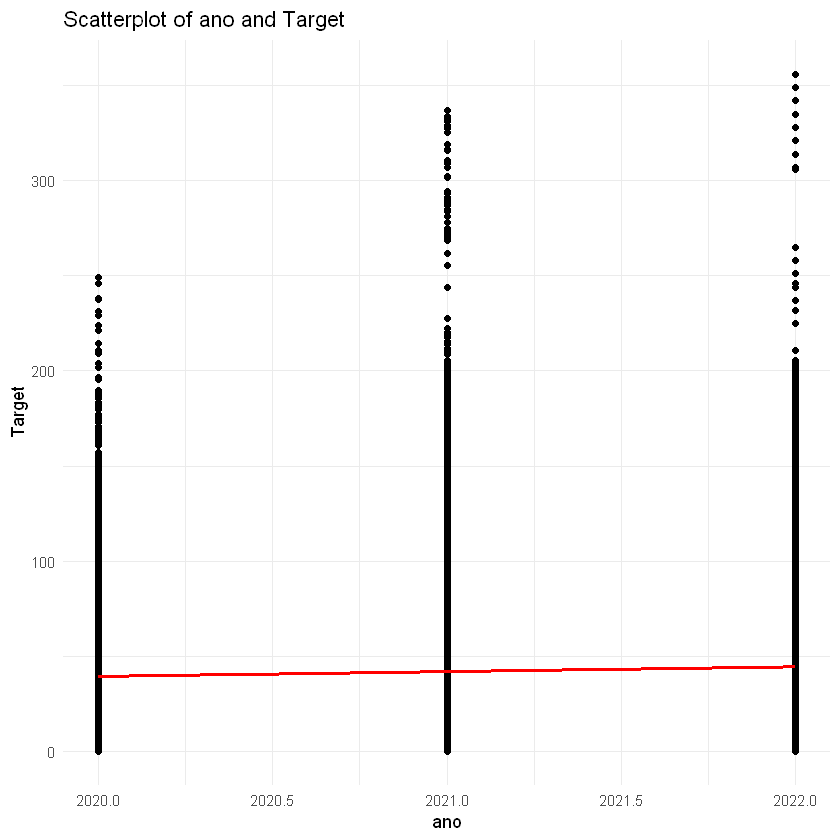

`geom_smooth()` using formula = 'y ~ x'


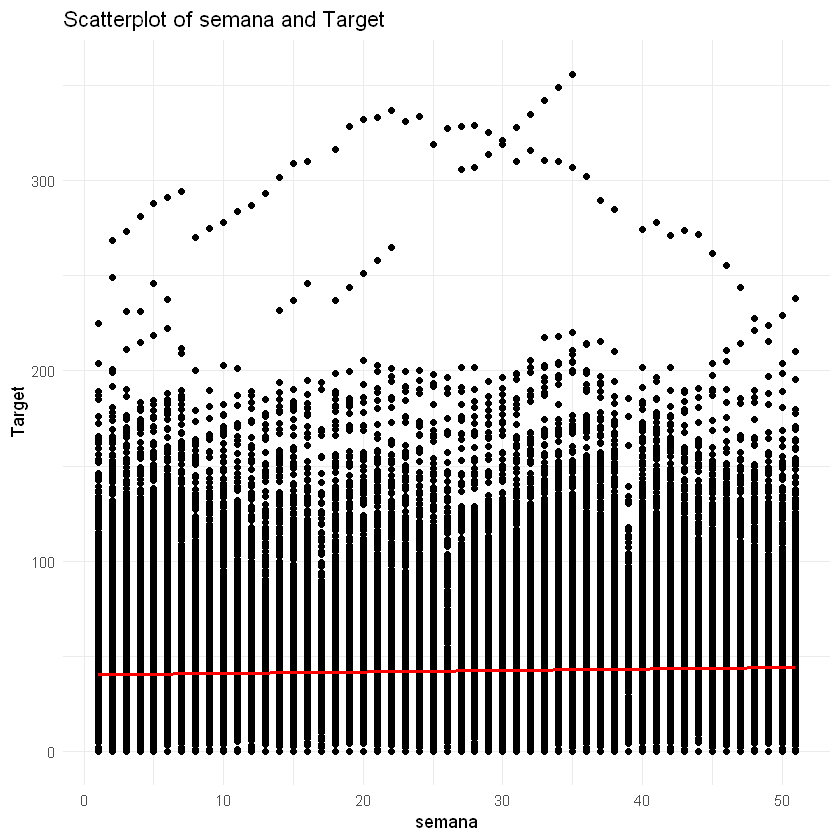

`geom_smooth()` using formula = 'y ~ x'


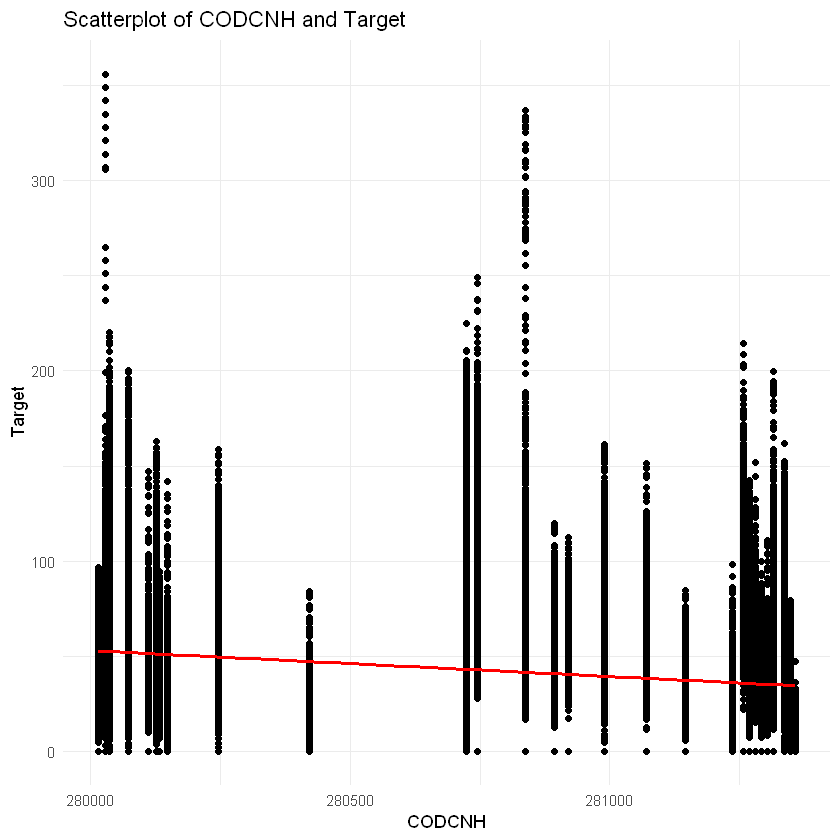

`geom_smooth()` using formula = 'y ~ x'


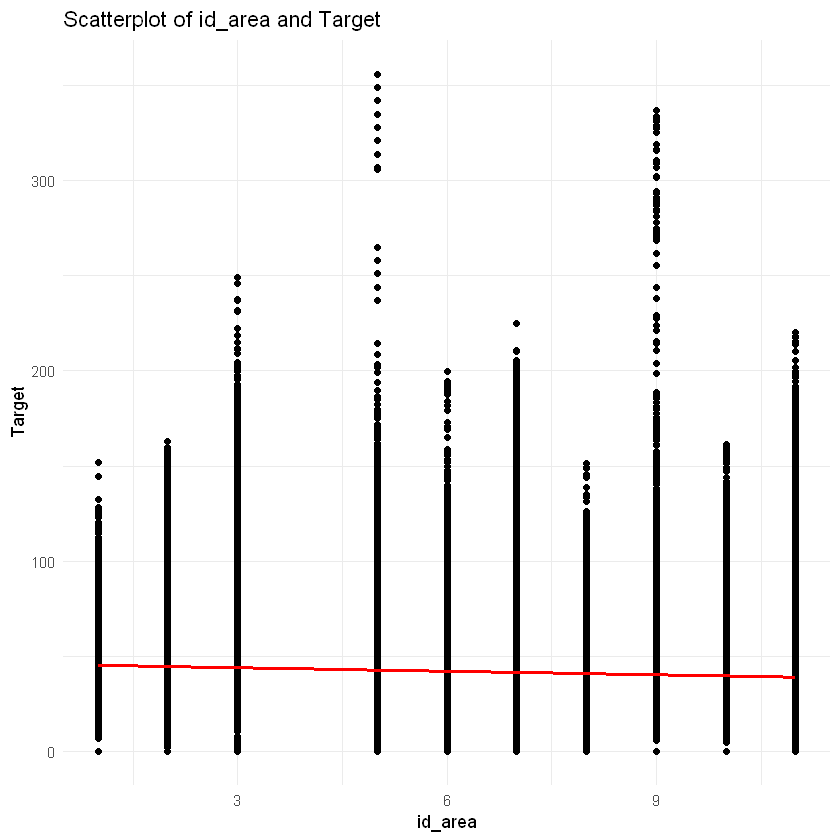

`geom_smooth()` using formula = 'y ~ x'


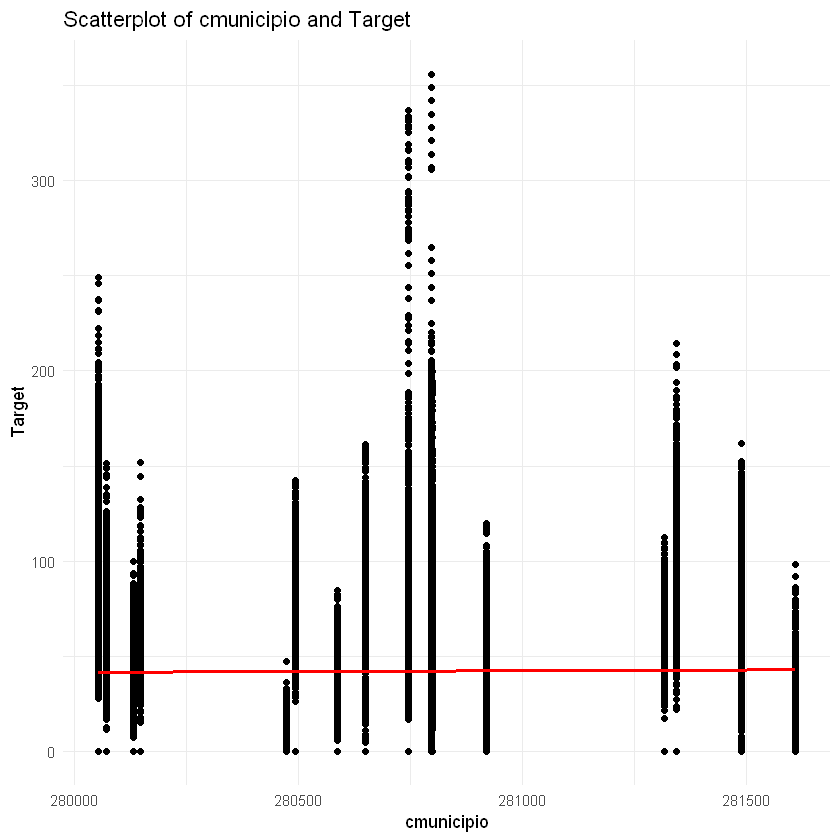

`geom_smooth()` using formula = 'y ~ x'


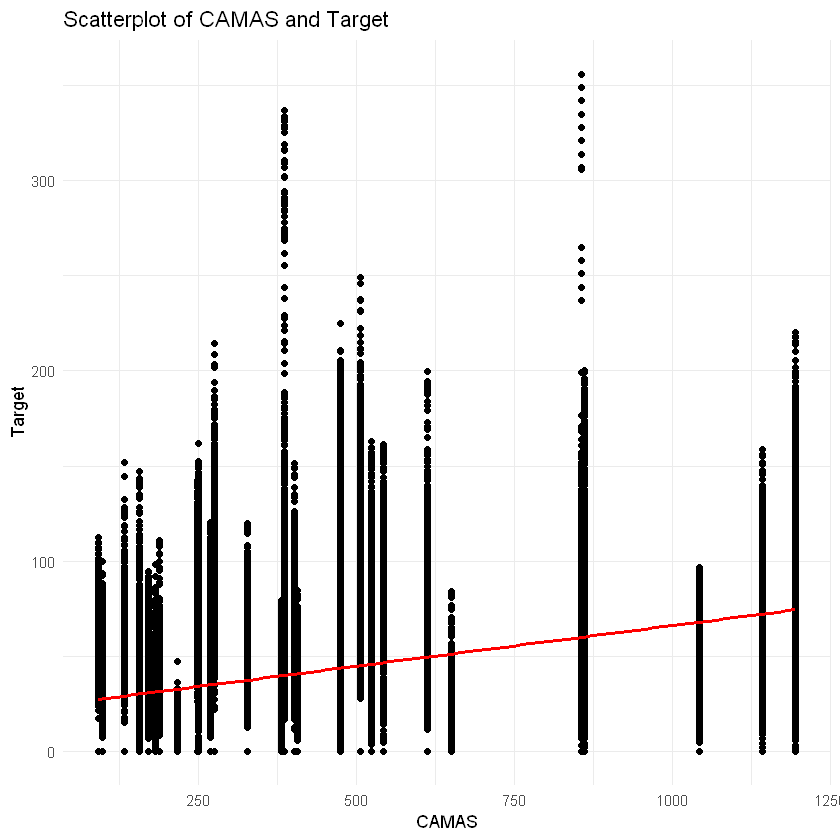

`geom_smooth()` using formula = 'y ~ x'


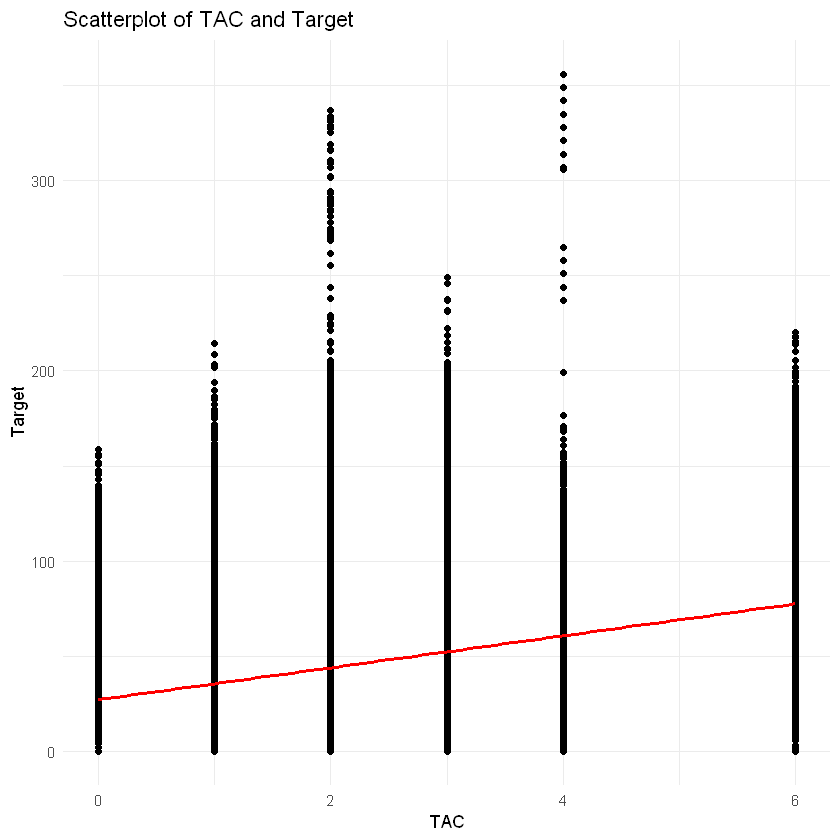

`geom_smooth()` using formula = 'y ~ x'


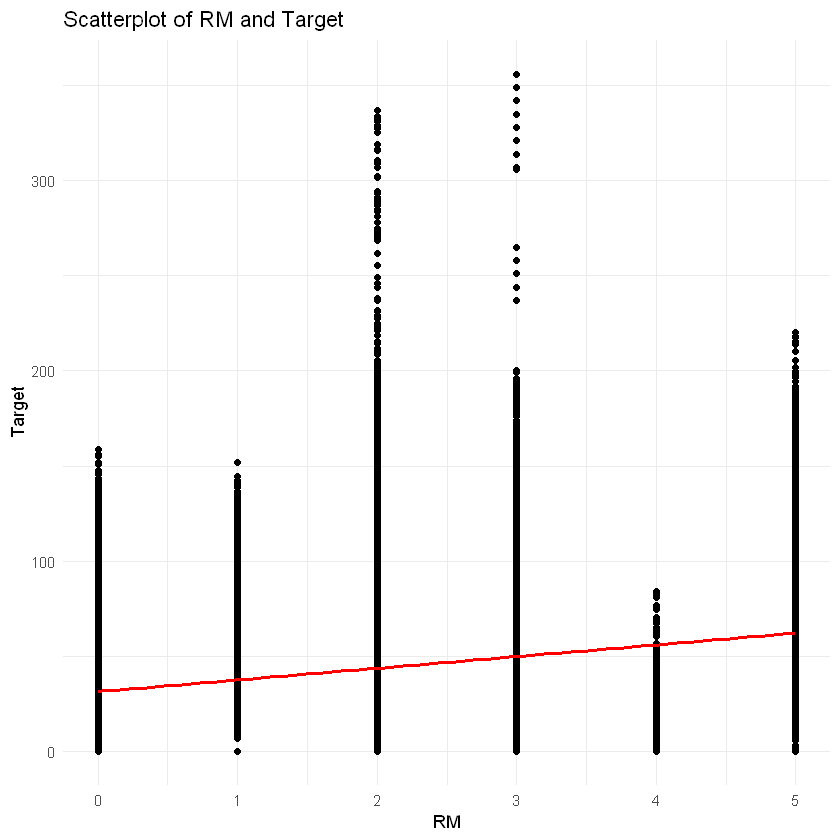

`geom_smooth()` using formula = 'y ~ x'


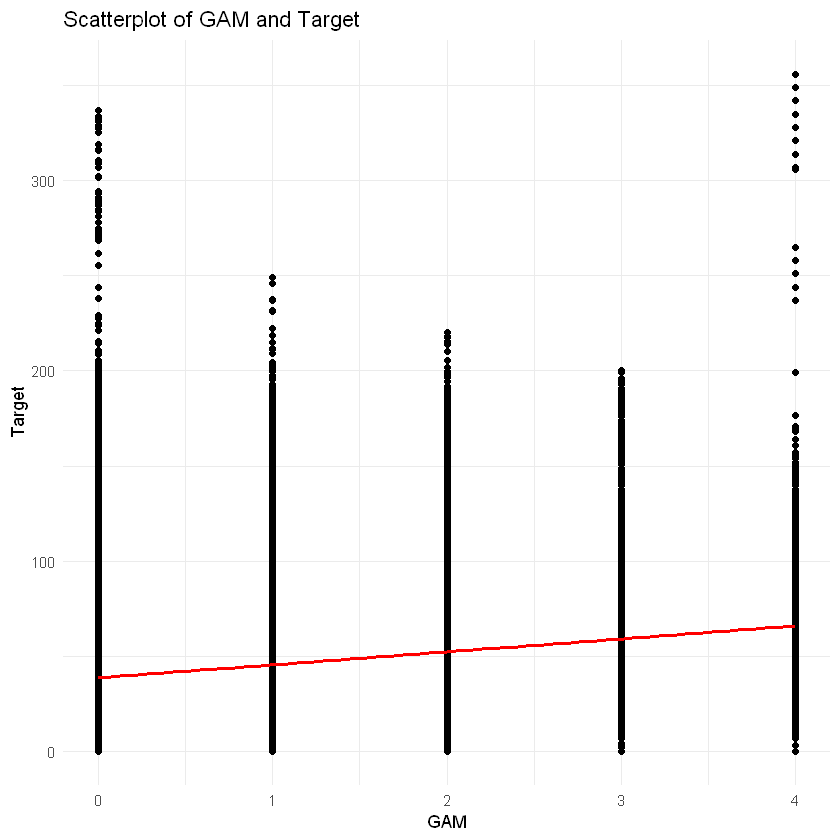

`geom_smooth()` using formula = 'y ~ x'


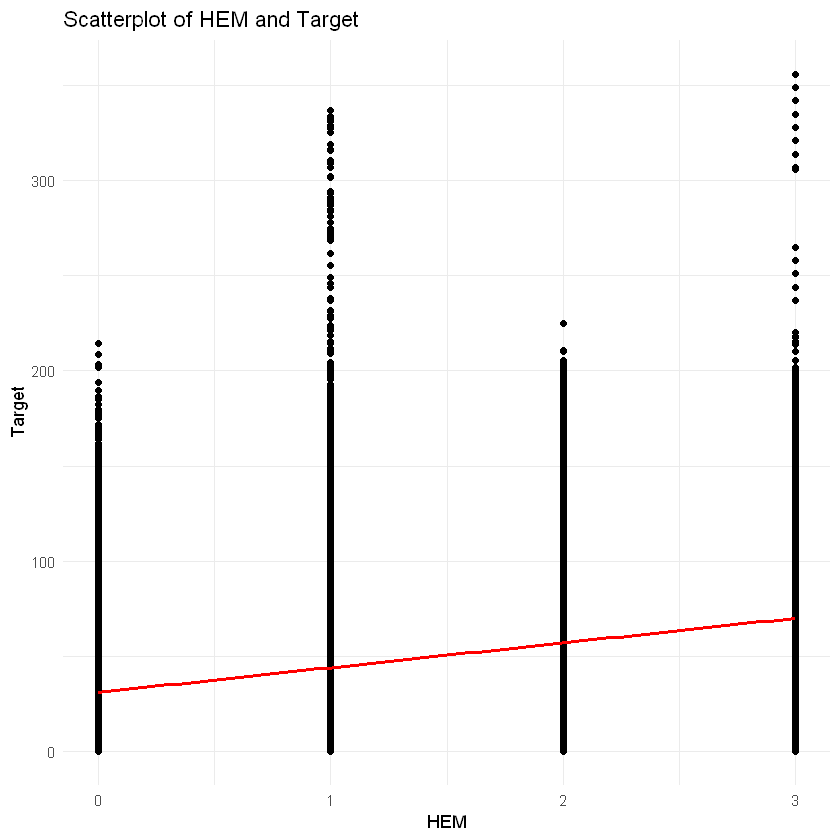

`geom_smooth()` using formula = 'y ~ x'


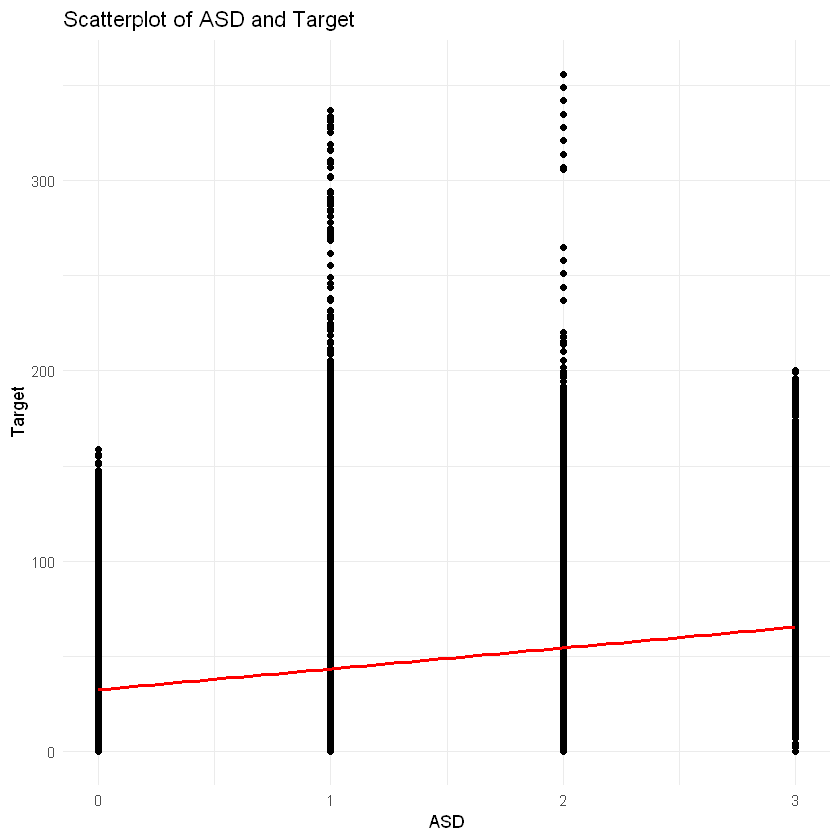

`geom_smooth()` using formula = 'y ~ x'


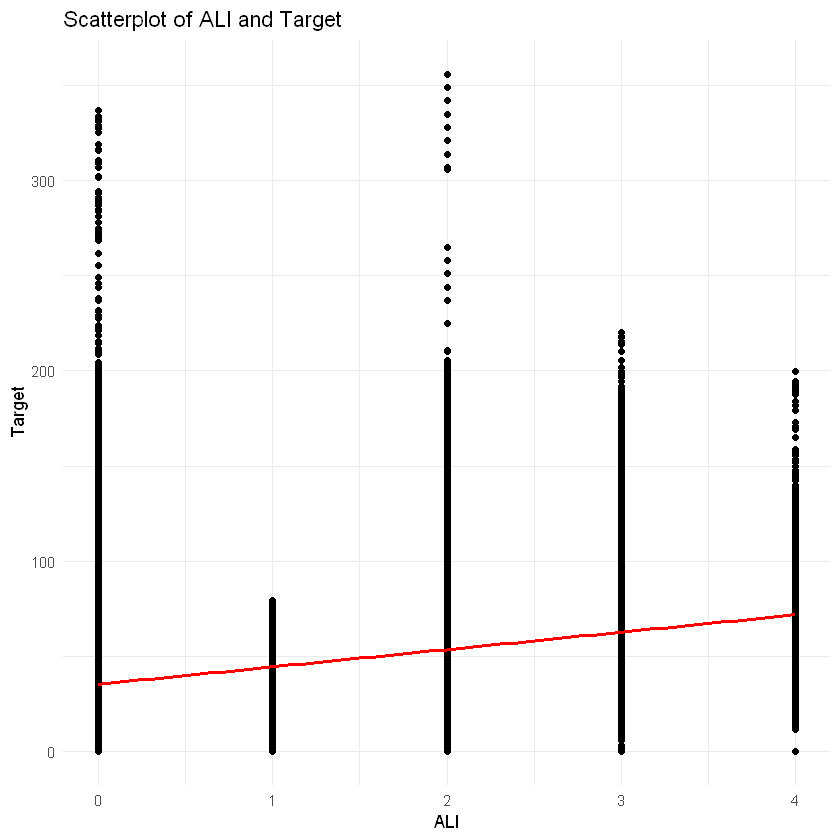

`geom_smooth()` using formula = 'y ~ x'


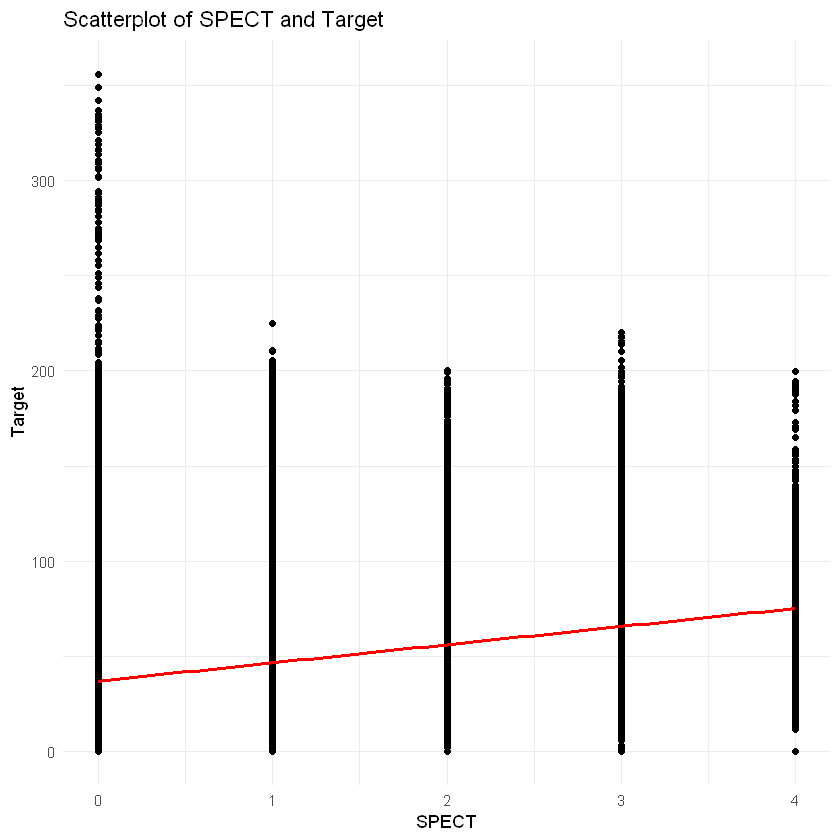

`geom_smooth()` using formula = 'y ~ x'


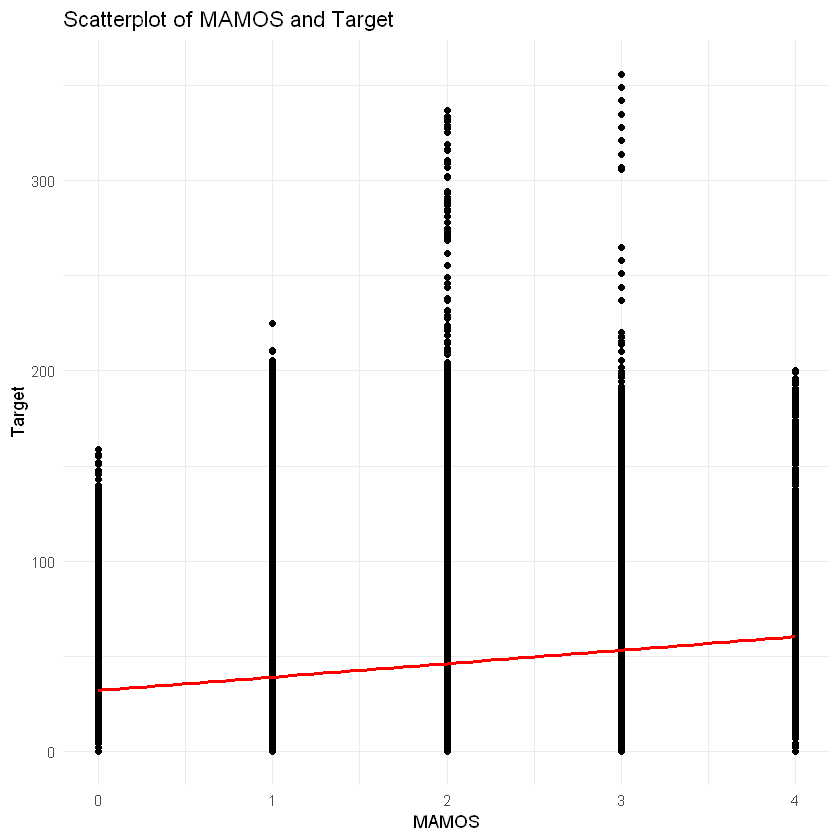

`geom_smooth()` using formula = 'y ~ x'


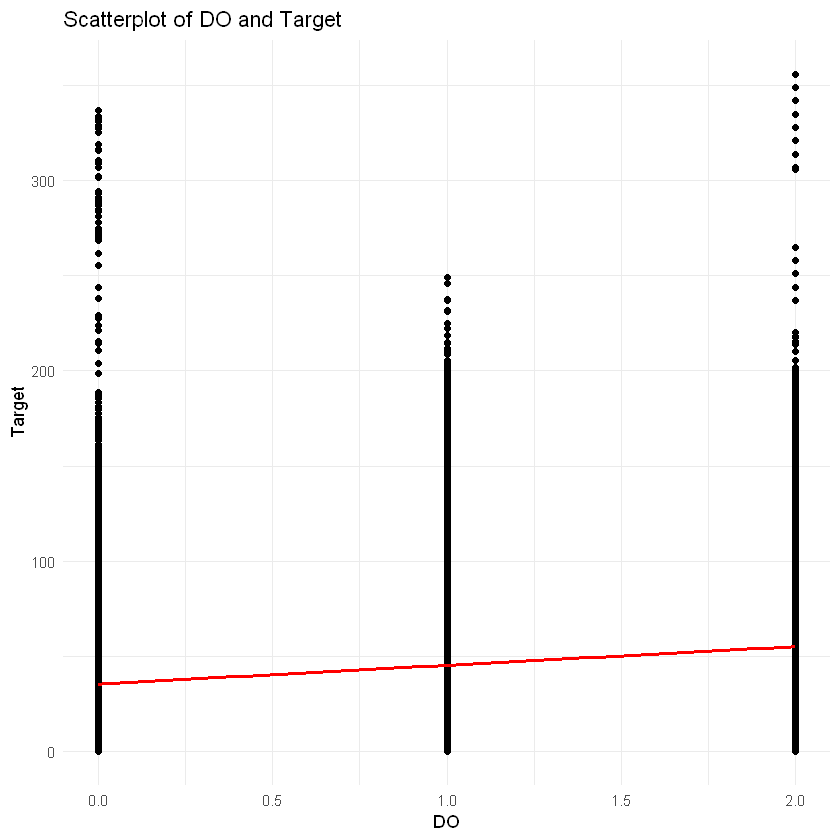

`geom_smooth()` using formula = 'y ~ x'


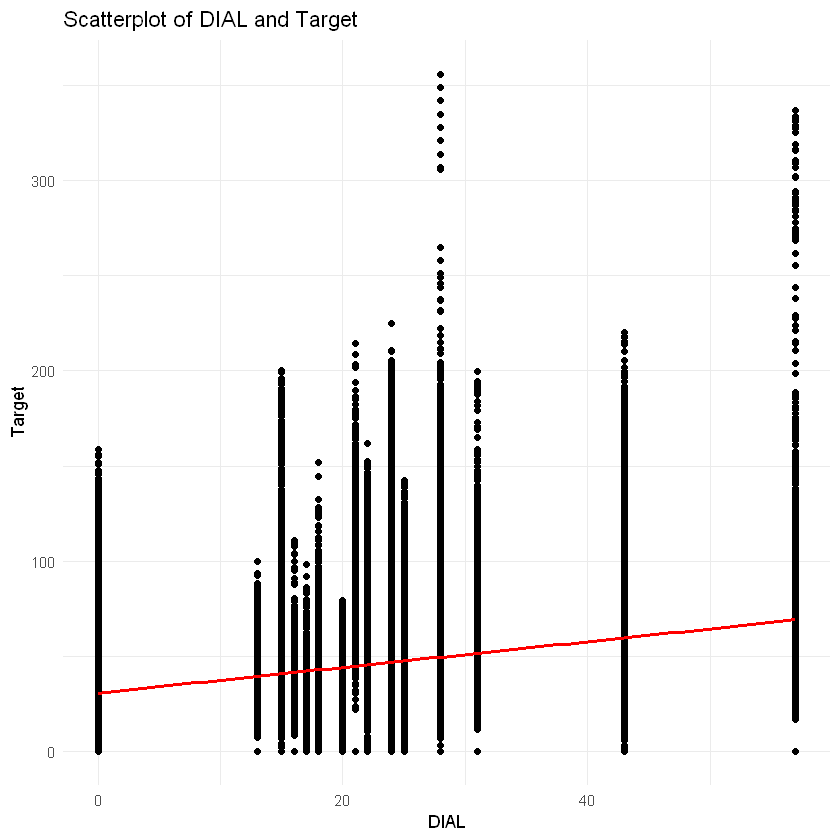

`geom_smooth()` using formula = 'y ~ x'


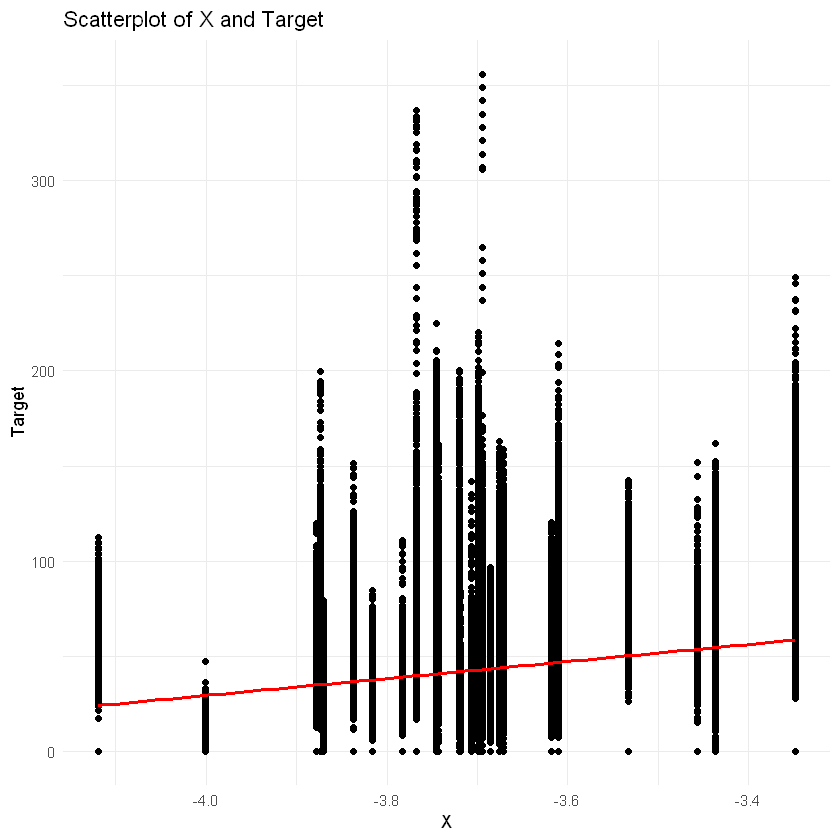

`geom_smooth()` using formula = 'y ~ x'


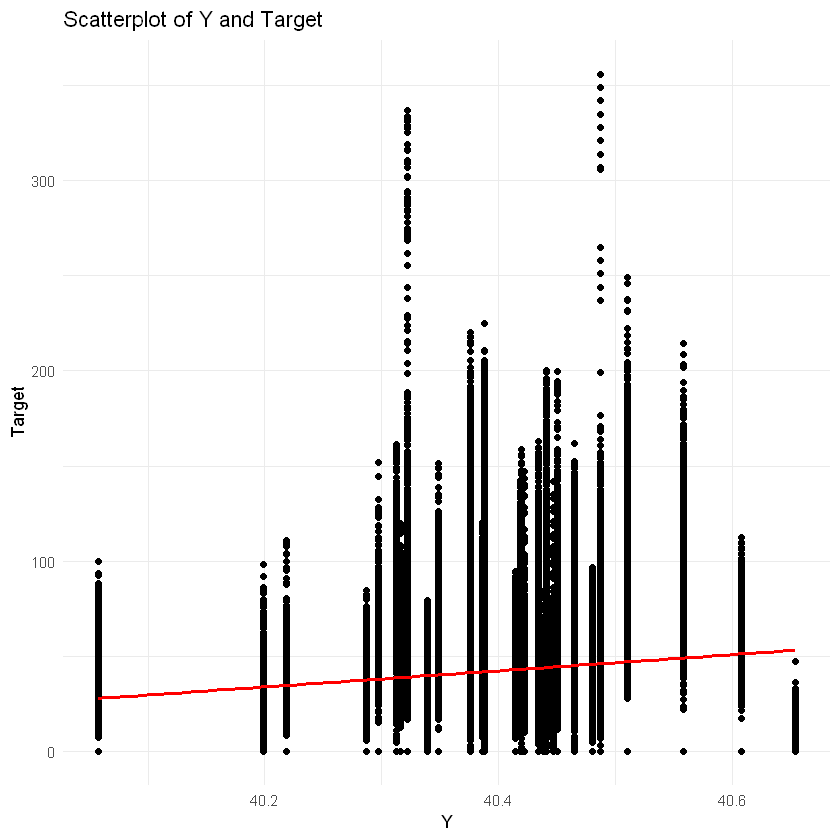

`geom_smooth()` using formula = 'y ~ x'


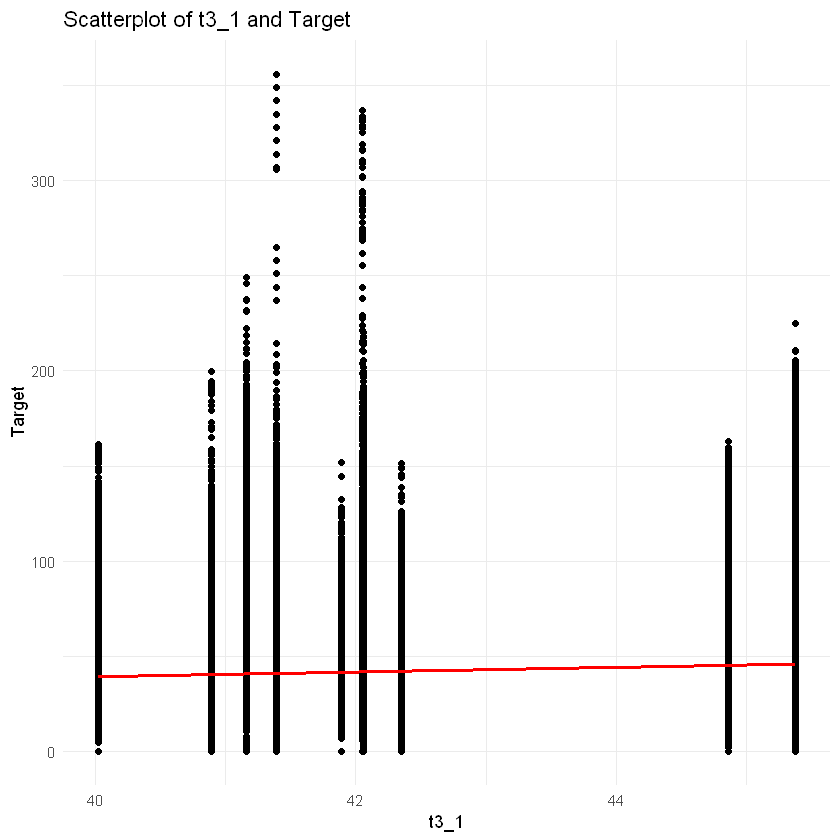

`geom_smooth()` using formula = 'y ~ x'


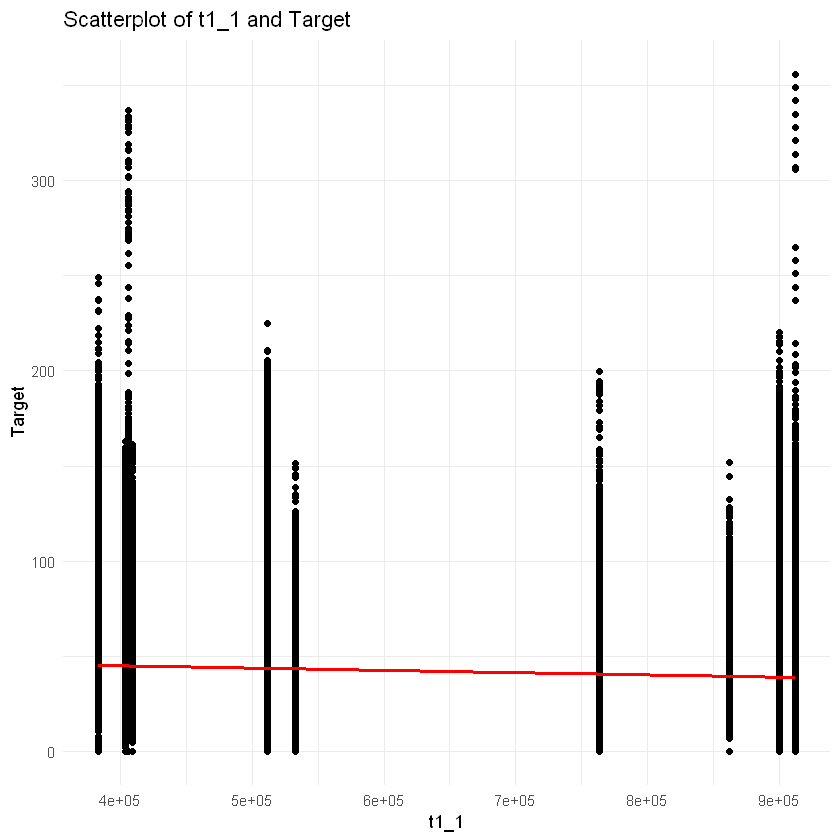

`geom_smooth()` using formula = 'y ~ x'


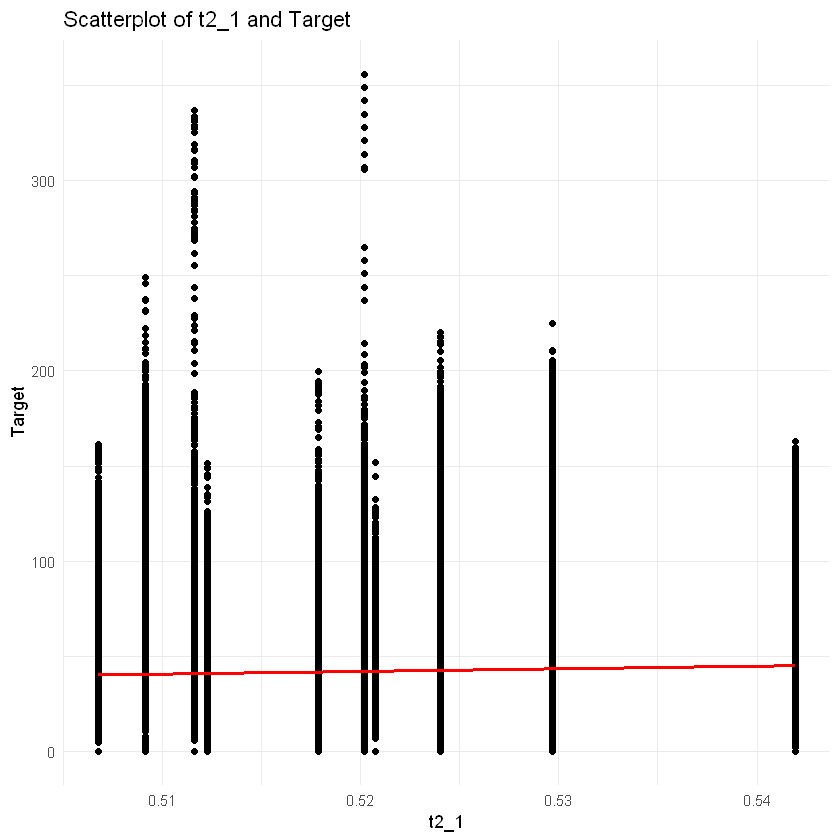

`geom_smooth()` using formula = 'y ~ x'


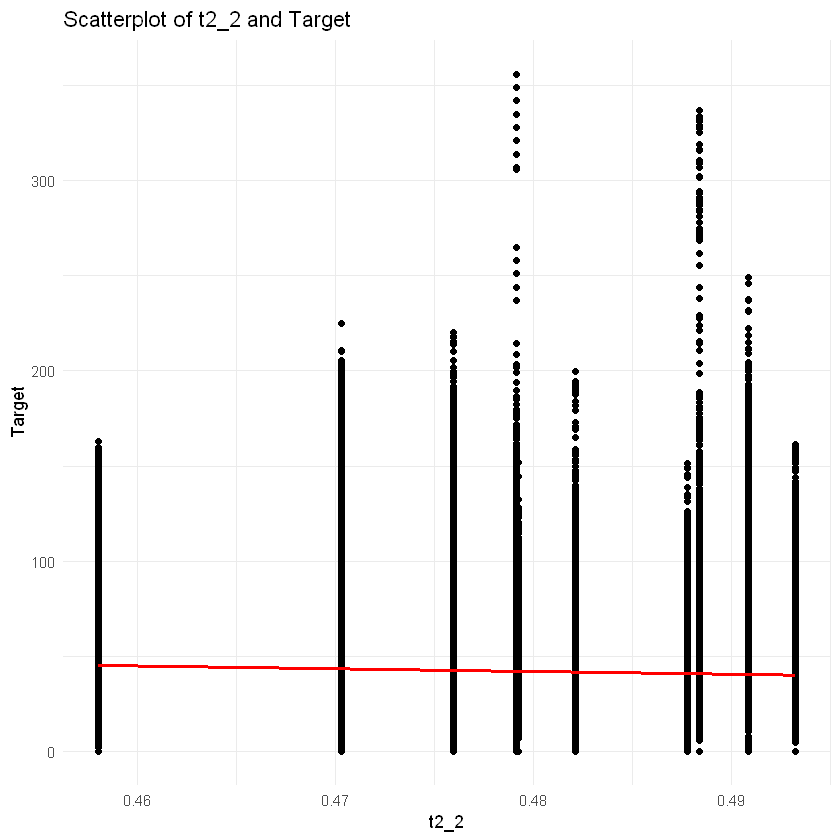

`geom_smooth()` using formula = 'y ~ x'


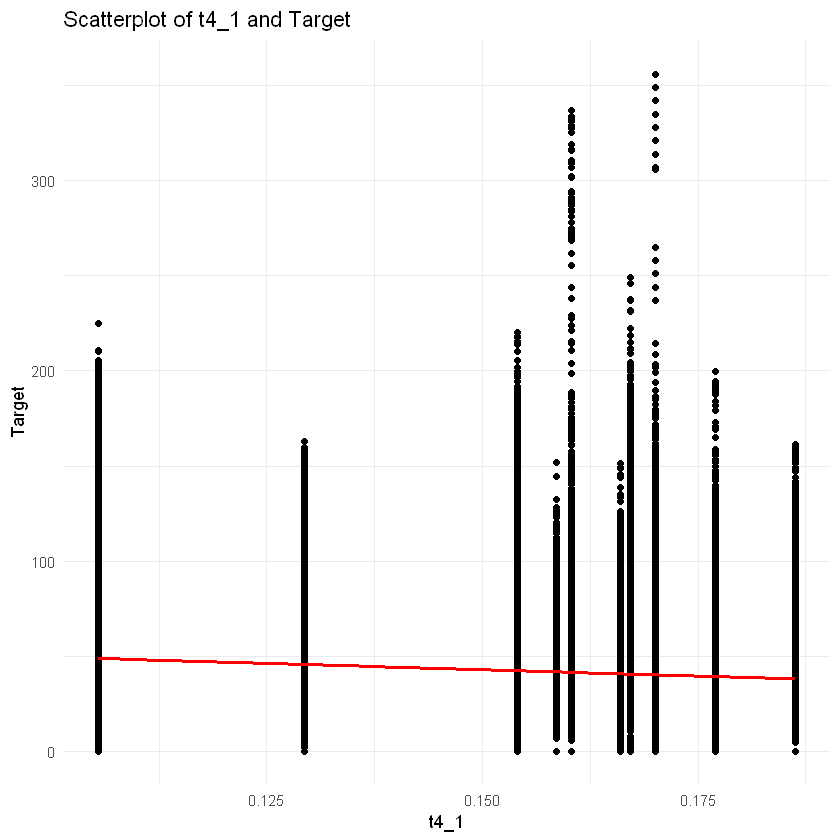

`geom_smooth()` using formula = 'y ~ x'


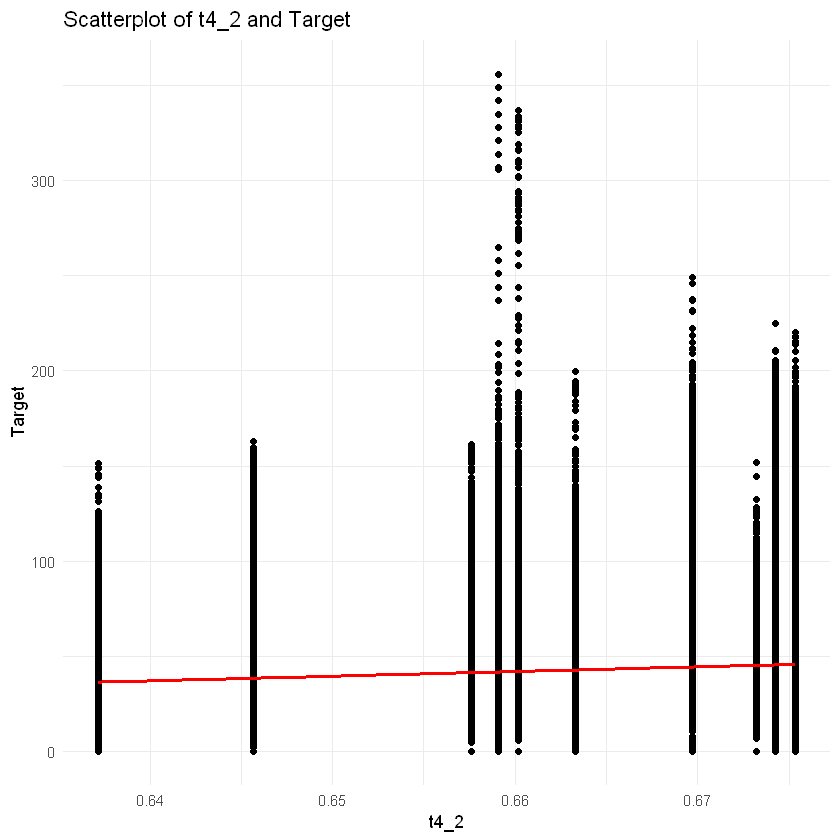

`geom_smooth()` using formula = 'y ~ x'


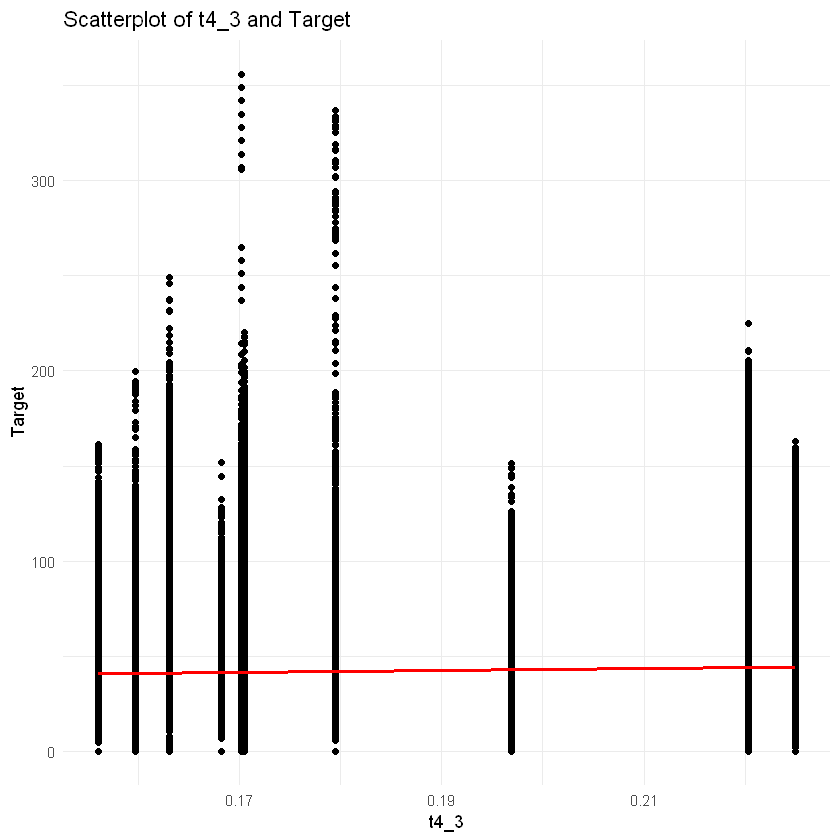

`geom_smooth()` using formula = 'y ~ x'


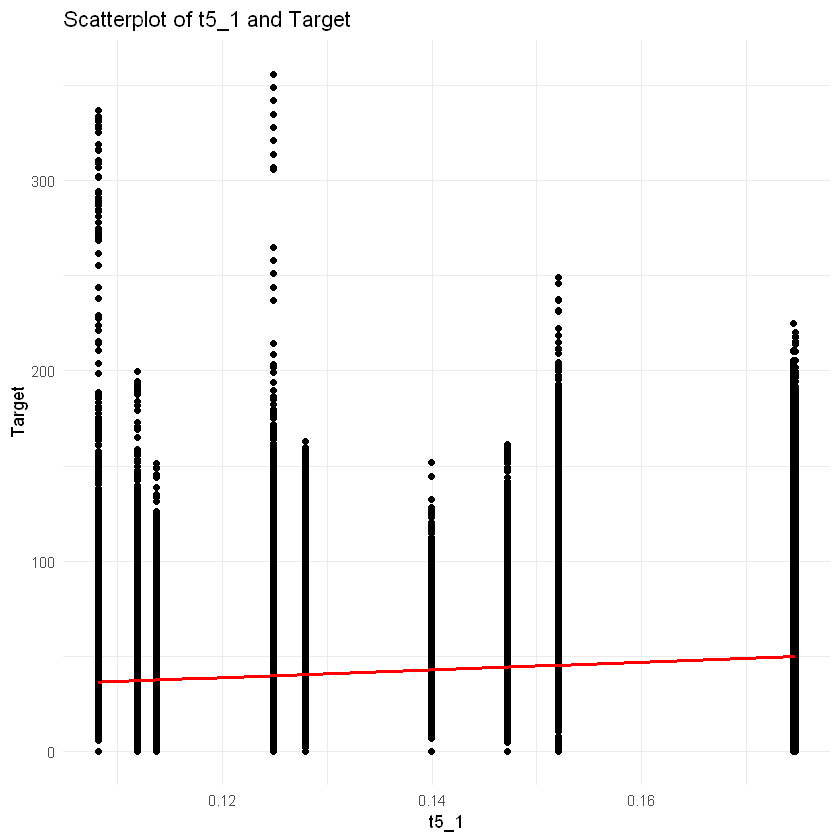

`geom_smooth()` using formula = 'y ~ x'


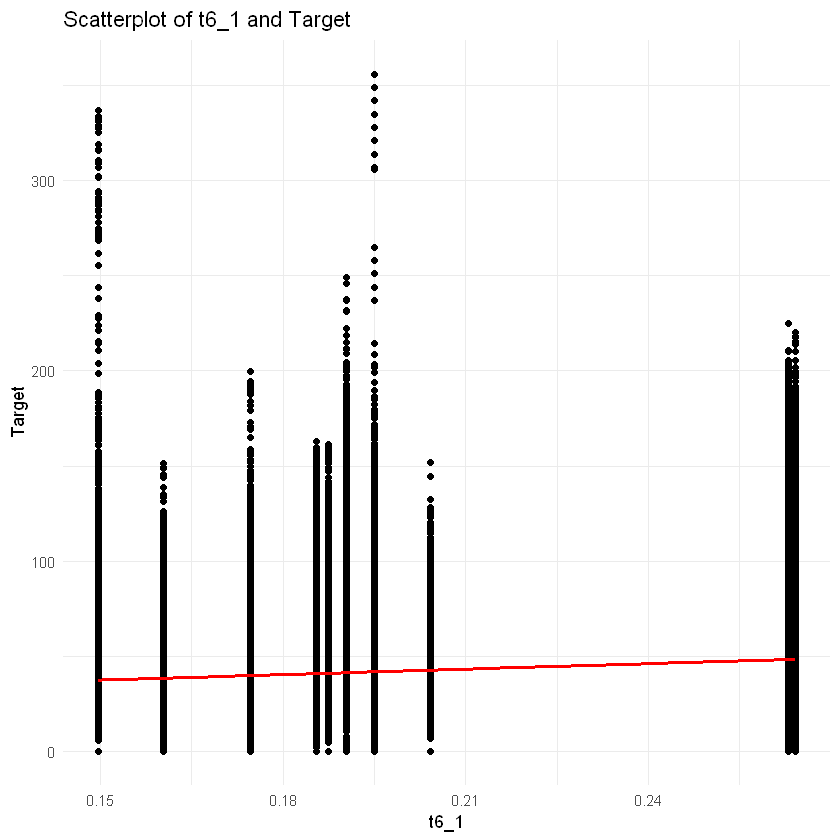

`geom_smooth()` using formula = 'y ~ x'


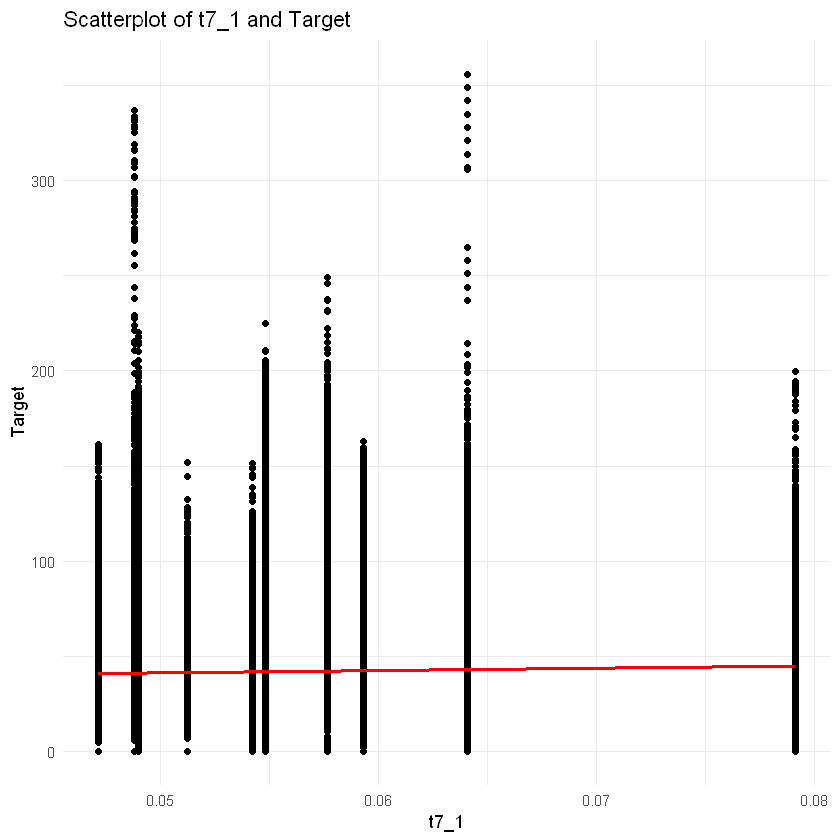

`geom_smooth()` using formula = 'y ~ x'


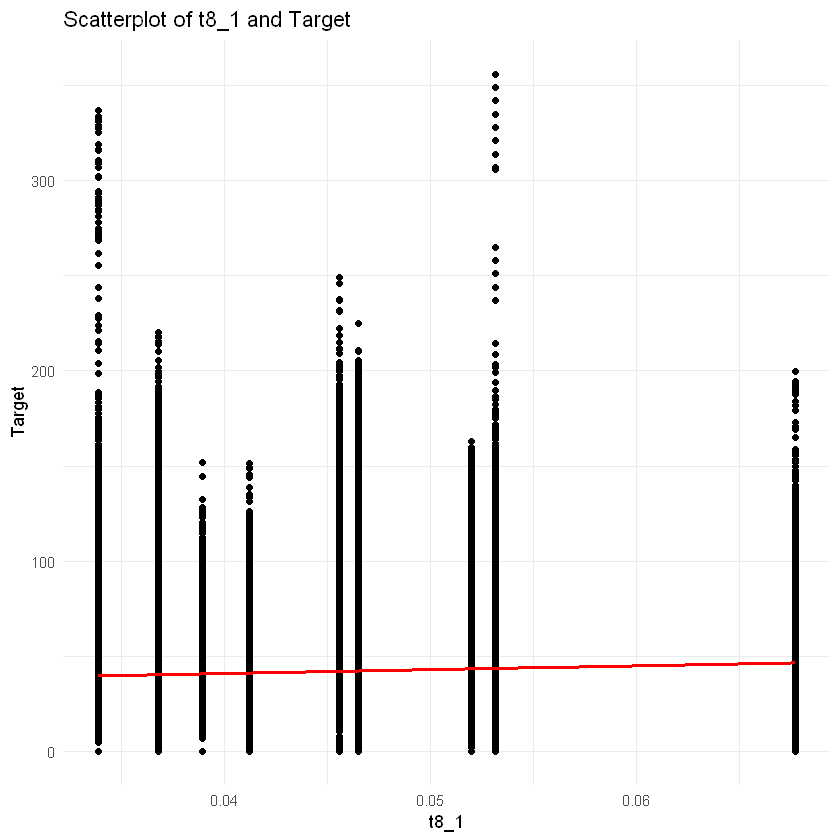

`geom_smooth()` using formula = 'y ~ x'


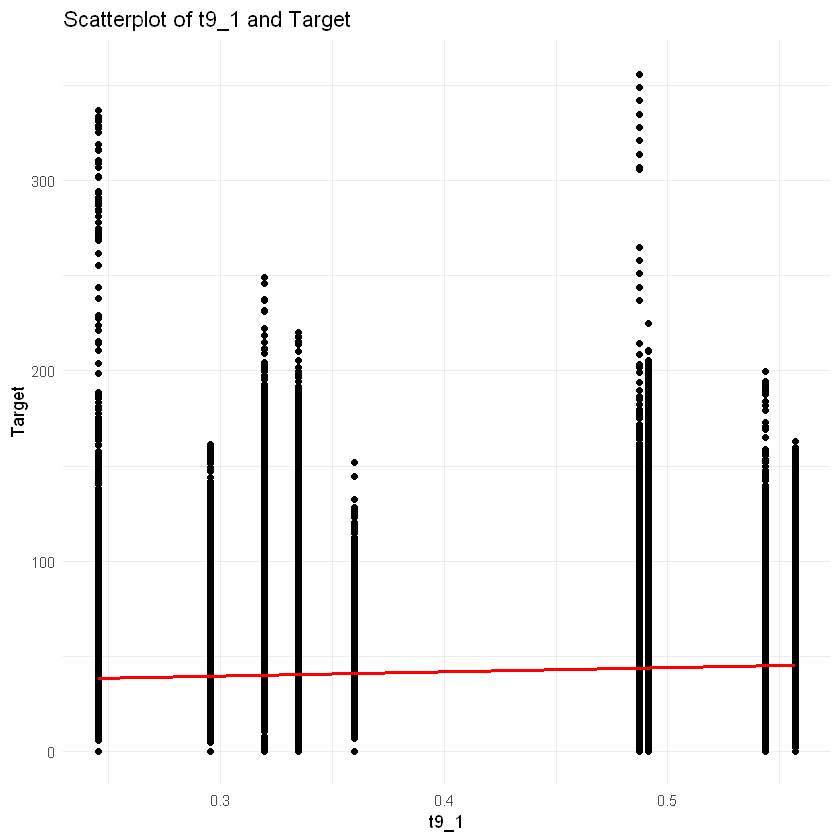

`geom_smooth()` using formula = 'y ~ x'


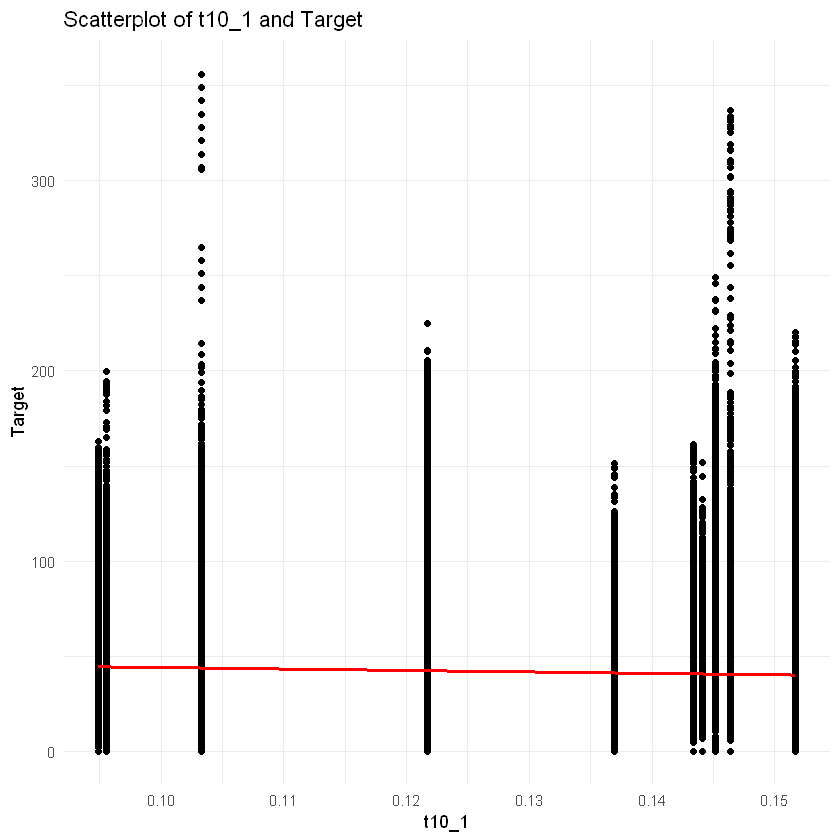

`geom_smooth()` using formula = 'y ~ x'


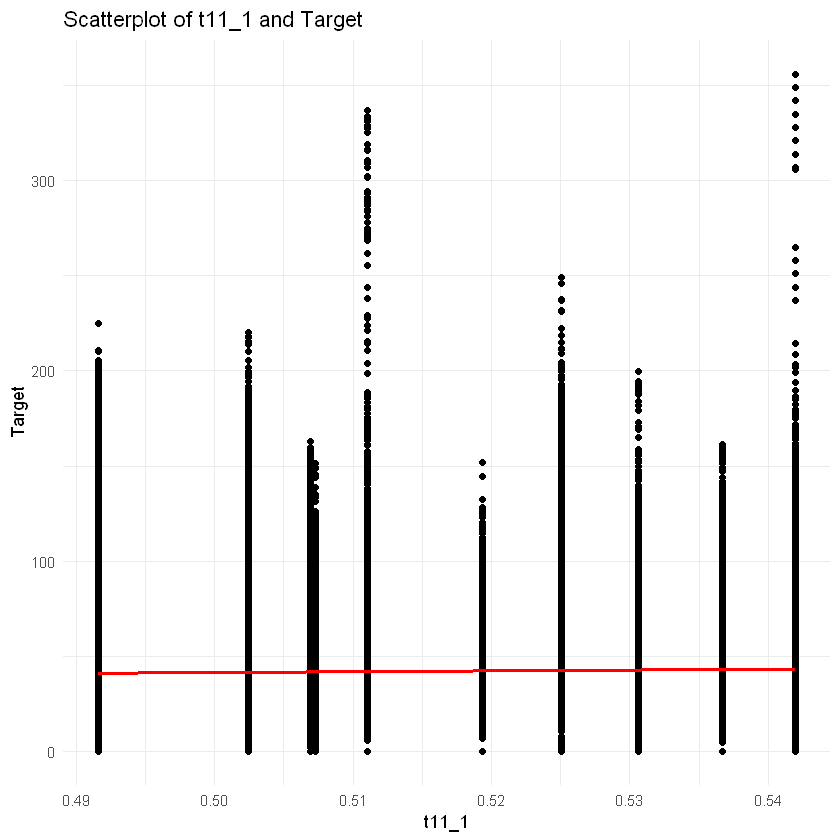

`geom_smooth()` using formula = 'y ~ x'


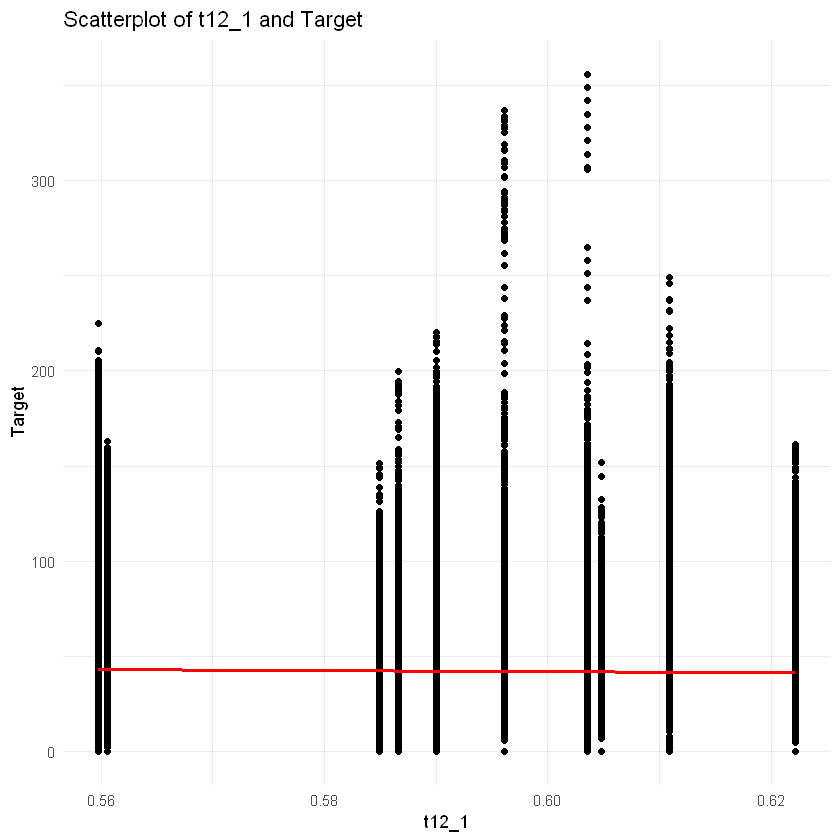

`geom_smooth()` using formula = 'y ~ x'


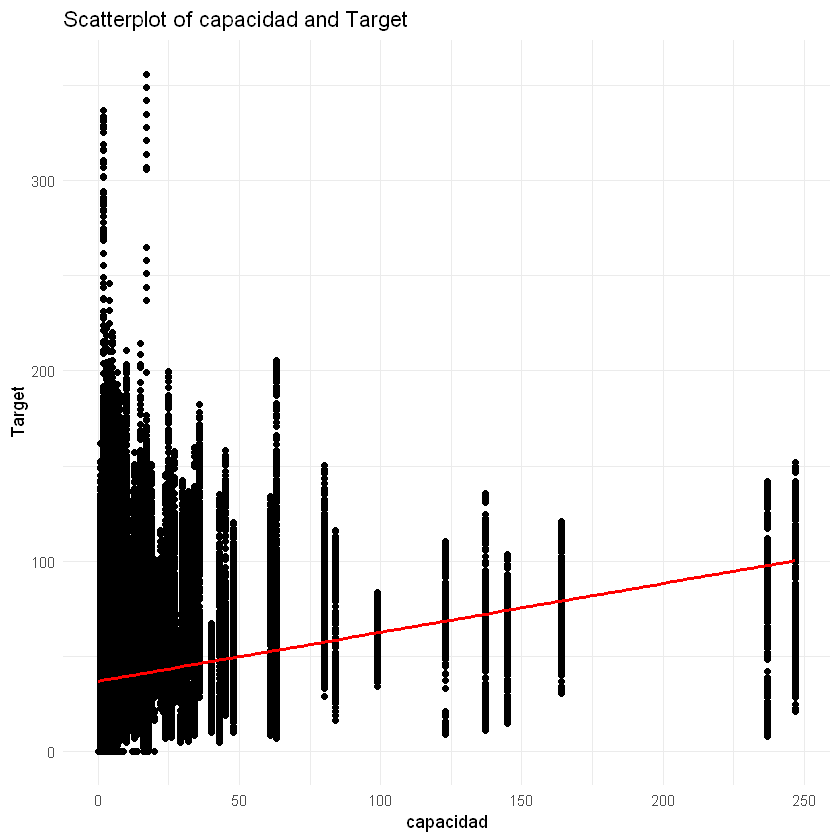

`geom_smooth()` using formula = 'y ~ x'


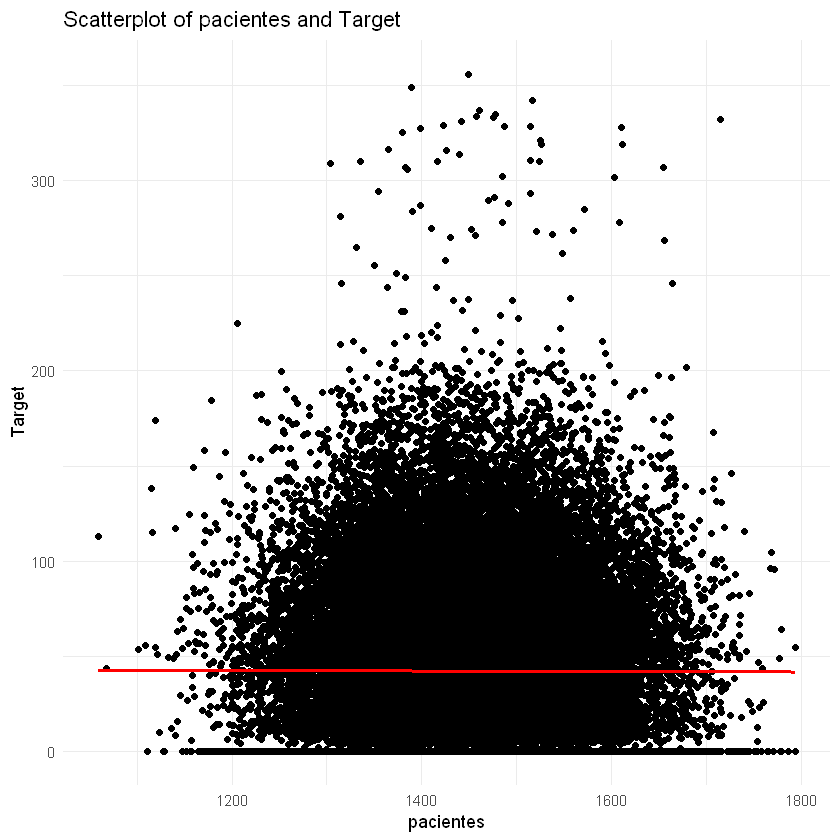

`geom_smooth()` using formula = 'y ~ x'


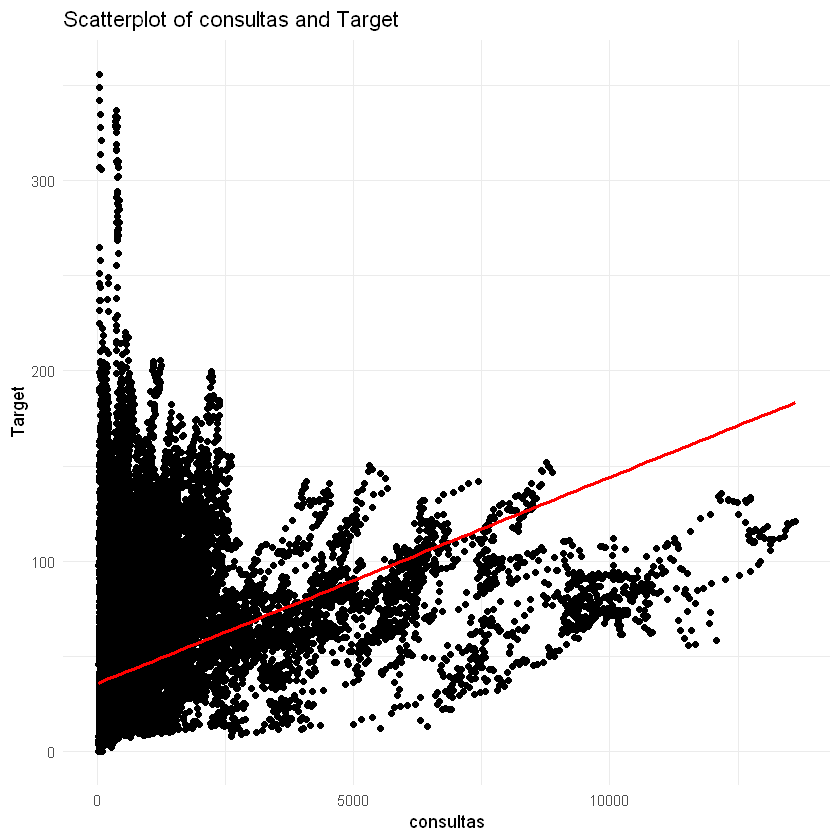

`geom_smooth()` using formula = 'y ~ x'


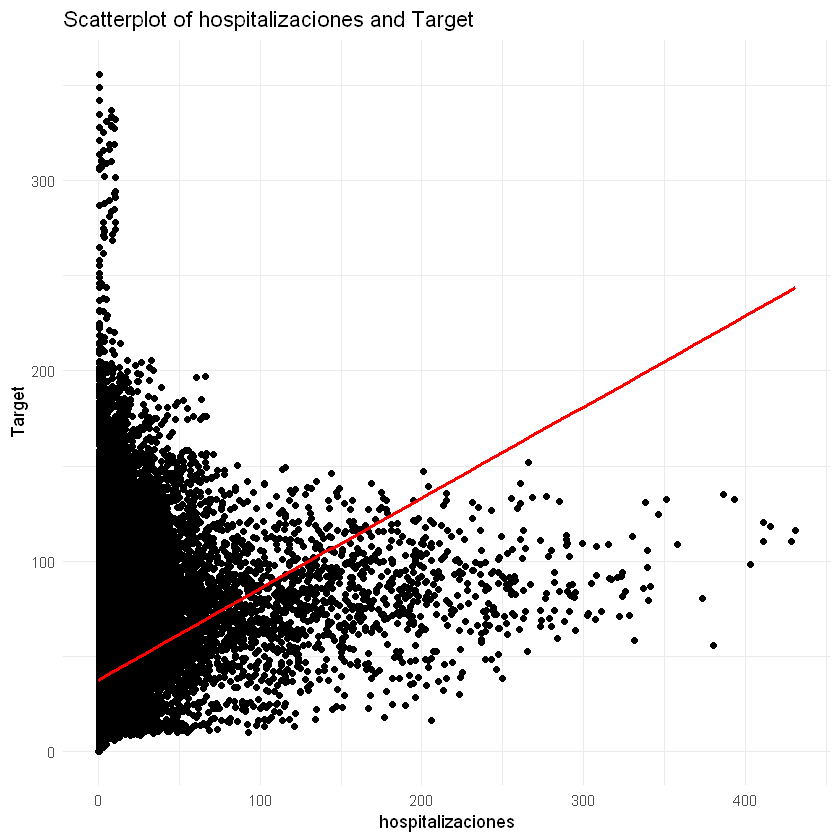

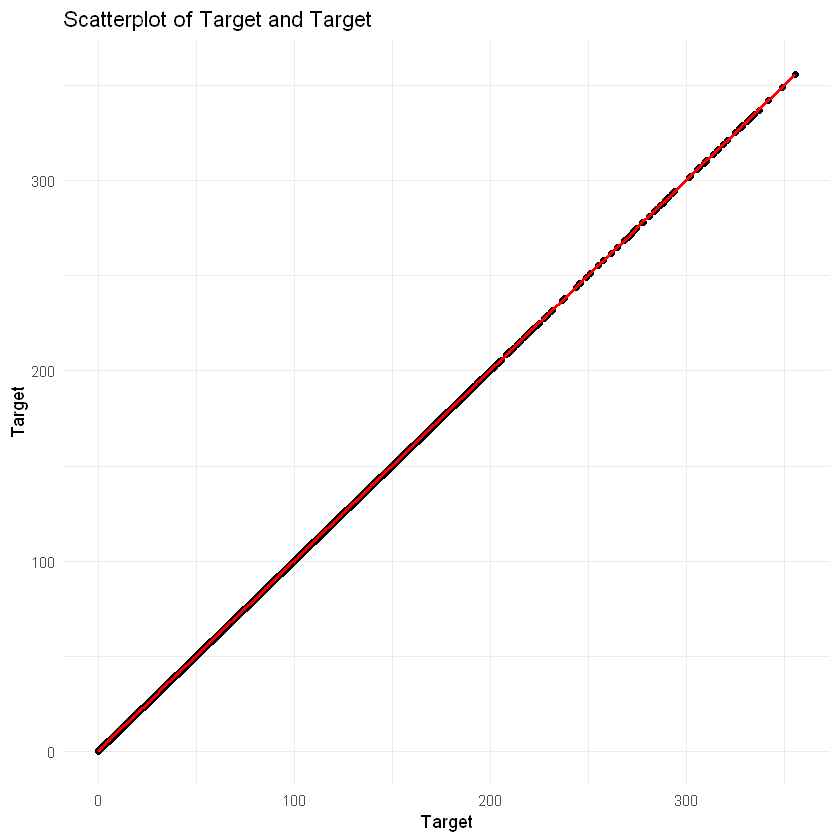

In [15]:
# Load the ggplot2 package
library(ggplot2)

# Create scatterplots
for (col in cols) {
  if (is.numeric(data[[col]])) {
    p <- ggplot(data, aes_string(x = col, y = 'Target')) +
      geom_point() +
      geom_smooth(method = "lm", se = FALSE, color = "red") +
      theme_minimal() +
      ggtitle(paste("Scatterplot of", col, "and Target"))
    print(p)
  }
}

## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [ ]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 11

In [ ]:
# caso <- "CU_XX"
# proceso <- '_10'
# tarea <- "_XX"
# archivo <- ""
# proper <- "_xxxxx"
# extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [ ]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [ ]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [ ]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Se ha realizado un análisis causal básico

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos son adecuados para los modelos que se preveen


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>